In [1]:
from pynq import Overlay
from pynq.lib.iic import *
from ov5640_config import *
from pynq.lib.video import *
from matplotlib import pyplot as plt
from time import sleep
import pynq.lib.dma
from pynq import allocate
import cv2
import os
import shutil

## Instantiate Overlay and download bitstream

In [2]:
hdmi_test = Overlay("./../bitstreams/hdmi_test_720p.bit")

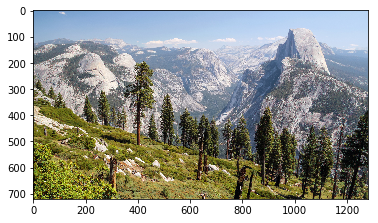

In [3]:
img = plt.imread("./../images/hdmi/720p.jpg")
plt.imshow(img)

In [4]:
for i in range(0,1280):
    print(img[719,i],i)

[ 62 145  55] 0
[122 119  38] 1
[55 47 10] 2
[60 82 20] 3
[77 70 18] 4
[60 58 10] 5
[59 56 11] 6
[ 71 101  27] 7
[136 157  56] 8
[88 63  9] 9
[56 93 24] 10
[110 143  28] 11
[139 180  58] 12
[148 166  32] 13
[137 157  23] 14
[140 163  29] 15
[164 171  41] 16
[174 176  53] 17
[182 187  59] 18
[106 112  50] 19
[36 44  3] 20
[47 47 13] 21
[60 66 20] 22
[ 68 117  26] 23
[124 136  36] 24
[140 103  33] 25
[139  84  30] 26
[154 115  56] 27
[113  48  16] 28
[22 20  8] 29
[ 63 101  28] 30
[122 126   6] 31
[133 146   6] 32
[158 187  47] 33
[167 123  14] 34
[93 82  2] 35
[145 180  60] 36
[141 131  10] 37
[93 85 12] 38
[127 111  13] 39
[110 111   0] 40
[ 99 107   4] 41
[111 122  17] 42
[171 181  46] 43
[135 153  19] 44
[153 144  23] 45
[174 185  57] 46
[173 174  38] 47
[158 171  57] 48
[140 116  70] 49
[143 135 112] 50
[168 166 105] 51
[111 100  18] 52
[107 114  21] 53
[130 160  48] 54
[142 139  34] 55
[114 101  33] 56
[190 195  77] 57
[162 154  30] 58
[134 146  34] 59
[129 162  23] 60
[145 171  48

[160 165  99] 601
[166 166 104] 602
[162 158  97] 603
[149 143  81] 604
[162 153  86] 605
[146 137  62] 606
[152 139  61] 607
[147 125  52] 608
[173 139  65] 609
[198 152  77] 610
[194 172  87] 611
[199 166  89] 612
[175 139  65] 613
[182 154  80] 614
[175 149  74] 615
[197 168  90] 616
[185 164  81] 617
[184 162  79] 618
[203 178  94] 619
[181 156  74] 620
[175 165  80] 621
[182 166  88] 622
[155 127  54] 623
[161 158  79] 624
[156 153  76] 625
[150 145  81] 626
[132 118  55] 627
[118 105  37] 628
[158 146  74] 629
[181 173  88] 630
[183 166  84] 631
[132 146  69] 632
[152 140  66] 633
[157 155  81] 634
[154 157  80] 635
[197 159  86] 636
[178 155  87] 637
[112  98  49] 638
[125 129  78] 639
[68 80 42] 640
[79 67 27] 641
[60 40 13] 642
[91 81 46] 643
[130 125  69] 644
[93 68 27] 645
[16  4 14] 646
[6 6 4] 647
[9 5 6] 648
[24  8 11] 649
[33 28 25] 650
[74 40 30] 651
[196 170 153] 652
[101  61  61] 653
[22 16  4] 654
[200 180 179] 655
[132 109  78] 656
[156  98  60] 657
[106  65  35] 65

[129 139  68] 1099
[150 108  50] 1100
[146 133  65] 1101
[112 121  66] 1102
[49 53 26] 1103
[41 43 30] 1104
[49 42 16] 1105
[96 77 34] 1106
[139 136  67] 1107
[164 159  77] 1108
[148 144  57] 1109
[159 147  63] 1110
[183 175  90] 1111
[180 174  76] 1112
[190 173  81] 1113
[182 169  75] 1114
[172 163  68] 1115
[168 159  66] 1116
[162 162  76] 1117
[139 147  74] 1118
[124 125  68] 1119
[103  91  43] 1120
[145 132  77] 1121
[141 155  78] 1122
[144 145  69] 1123
[154 128  67] 1124
[160 143  73] 1125
[176 164  88] 1126
[172 168  95] 1127
[183 167  92] 1128
[199 177 104] 1129
[185 160  94] 1130
[175 154  99] 1131
[136 113  63] 1132
[126  94  43] 1133
[160 136  76] 1134
[166 151  86] 1135
[155 150  84] 1136
[161 142  74] 1137
[160 139  76] 1138
[144 135  78] 1139
[56 68 46] 1140
[28  6 18] 1141
[26 17 10] 1142
[15 15 15] 1143
[28 12 13] 1144
[18 25 17] 1145
[15 21 11] 1146
[22 14 11] 1147
[23 18 15] 1148
[28 25 18] 1149
[64 32 21] 1150
[97 83 56] 1151
[113 112  58] 1152
[110 109  52] 1153
[10

In [5]:
frame = allocate(shape=(720,1280,3),dtype=np.uint8,cacheable=True)
frame[:] = img[:]

# Check the attributes and methods in Overlay

In [6]:
hdmi_test.ip_dict

{'axi_dma_0': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb027b6f0>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma_0',
  'gpio': {},
  'interrupts': {},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40400000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4040FFFF',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '16',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '32',
   'C_M_AXI_MM2S_ADDR_WIDTH': '32',
   'C_M_AXI_MM2S_DATA_WIDTH': '64',
   'C_M_AXI_S2MM_ADDR_WIDTH': '32',
   'C_M_AXI_S2MM_DATA_WIDTH': '32',
   'C_M_AXI_SG_ADDR_WIDTH': '32',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_NUM_MM2S_CHANNELS': '1',
   'C_NUM_S2MM

## Configure VDMAs

In [7]:
vdma0 = hdmi_test.axi_vdma_0

In [8]:
hex(hdmi_test.ip_dict["axi_vdma_0"]["phys_addr"])

'0x43000000'

In [79]:
#v_tc_0 = hdmi_test.v_tc_0

In [80]:
# mode = VideoMode(1280, 720, 24)
# v_tc_0.mode = mode
# v_tc_0.write(0x00,0x01)

In [81]:
# hex(hdmi_test.ip_dict["v_tc_0"]["phys_addr"])

In [9]:
mode = VideoMode(1280, 720, 24)
vdma0.readchannel.mode = mode
vdma0.writechannel.mode = mode

In [14]:
vdma0.readchannel.start()
vdma0.writechannel.start()

In [15]:
vdma0.writechannel.writeframe(frame)

## Close VDMAs

In [16]:
vdma0.writechannel.stop()
vdma0.readchannel.stop()